# Price Prediction using Regression

This is a tickets pricing monitoring system. It scrapes tickets pricing data periodically and stores it in a database. Ticket pricing changes based on demand and time, and there can be significant difference in price. We are creating this product mainly with ourselves in mind. Users can set up alarms using an email, choosing an origin and destination (cities), time (date and hour range picker) choosing a price reduction over mean price, etc.

**Following is the description for columns in the dataset**<br>
- insert_date: date and time when the price was collected and written in the database<br>
- origin: origin city <br>
- destination: destination city <br>
- start_date: train departure time<br>
- end_date: train arrival time<br>
- train_type: train service name<br>
- price: price<br>
- train_class: ticket class, tourist, business, etc.<br>
- fare: ticket fare, round trip, etc <br>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

#### **Task 1: Import Dataset and create a copy of that dataset**

In [4]:
#write code here
data = pd.read_csv('data1.csv')
df = data.copy()

#### **Task 2: Display first five rows** 

In [6]:
#write code here
df.head()

,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,702,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,703,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,704,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +
3,705,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +
4,706,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo


In [8]:
df.shape

(215909, 10)

#### **Task 3: Drop 'unnamed: 0' column**

In [10]:
#write code here
df = df.drop(['Unnamed: 0'],axis=1)
print(df.shape)

(215909, 9)


#### **Task 4: Check the number of rows and columns**

In [12]:
#write code here
df.shape

(215909, 9)

#### **Task 5: Check data types of all columns**

In [14]:
#write code here
df.dtypes

insert_date     object
origin          object
destination     object
start_date      object
end_date        object
train_type      object
price          float64
train_class     object
fare            object
dtype: object

#### **Task 6: Check summary statistics**

In [16]:
#write code here
df.describe()

,price
count,202321.000000
mean,56.723877
std,25.531787
min,16.600000
25%,28.350000
50%,53.400000
75%,76.300000
max,206.800000


#### **Task 7: Check summary statistics of all columns, including object dataypes**

In [18]:
df.describe(include=["O"])

,insert_date,origin,destination,start_date,end_date,train_type,train_class,fare
count,215909,215909,215909,215909,215909,215909,215266,215266
unique,30543,5,5,2231,2870,16,5,5
top,2019-05-09 15:02:02,MADRID,MADRID,2019-06-02 17:30:00,2019-06-02 23:03:00,AVE,Turista,Promo
freq,90,110440,105469,2089,1278,126577,164016,132065


In [20]:
df.describe(include='all')

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
count,215909,215909,215909,215909,215909,215909,202321.000000,215266,215266
unique,30543,5,5,2231,2870,16,NaN,5,5
top,2019-05-09 15:02:02,MADRID,MADRID,2019-06-02 17:30:00,2019-06-02 23:03:00,AVE,NaN,Turista,Promo
freq,90,110440,105469,2089,1278,126577,NaN,164016,132065
mean,NaN,NaN,NaN,NaN,NaN,NaN,56.723877,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,25.531787,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,16.600000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,28.350000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,53.400000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,76.300000,NaN,NaN


**Question: Explain the summary statistics for the above data set**

**Answer:** The "MADRID" is the most favourit Origin. About 60% people are used to travel with "Promo" fare.

#### **Task 8: Check null values in dataset**

In [22]:
#write code here
df.isnull().sum()

insert_date        0
origin             0
destination        0
start_date         0
end_date           0
train_type         0
price          13588
train_class      643
fare             643
dtype: int64

#### **Task 9: Fill the Null values in the 'price' column.**<br>
*Hint: Take mean*

In [24]:
#write code here
mean_value = df['price'].mean()
df['price'].fillna(mean_value, inplace=True)
df.head()

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +
3,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +
4,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo


In [26]:
df.isnull().sum()

insert_date      0
origin           0
destination      0
start_date       0
end_date         0
train_type       0
price            0
train_class    643
fare           643
dtype: int64

#### **Task 10: Drop the rows containing Null values in the attributes train_class and fare**

In [28]:
#write code here
df = df.dropna(subset=['train_class', 'fare'])

In [30]:
df.isnull().sum()

insert_date    0
origin         0
destination    0
start_date     0
end_date       0
train_type     0
price          0
train_class    0
fare           0
dtype: int64

#### **Task 11: Drop 'insert_date'**

In [32]:
#write code here
df.drop(columns=['insert_date'], inplace=True)

**Check null values again in dataset**

In [34]:
df.isnull().sum()

origin         0
destination    0
start_date     0
end_date       0
train_type     0
price          0
train_class    0
fare           0
dtype: int64

In [ ]:
#write code here


#### **Task 12: Plot number of people boarding from different stations**


<Axes: xlabel='origin', ylabel='count'>

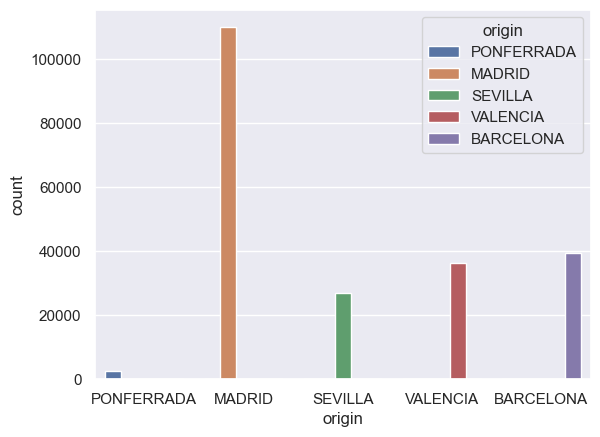

In [36]:
#write code here
sns.countplot(x='origin',hue='origin', data=df)

**Question: What insights do you get from the above plot?**

**Answer:** Maximum passenger board from Madrid and least no. of passenger board from Ponferrada.

#### **Task 13: Plot number of people for the destination stations**


<Axes: xlabel='destination', ylabel='count'>

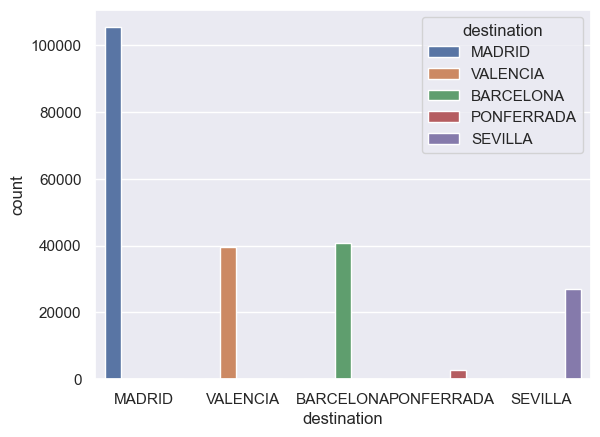

In [38]:
#write code here
sns.countplot(x='destination',hue='destination', data=df)

**Question: What insights do you get from the above graph?**

**Answer:** Maximum passengers have destination to Madrid and least no. of passengers have destination to Ponferrada.

#### **Task 14: Plot different types of train that runs in Spain**


<Axes: xlabel='train_type', ylabel='count'>

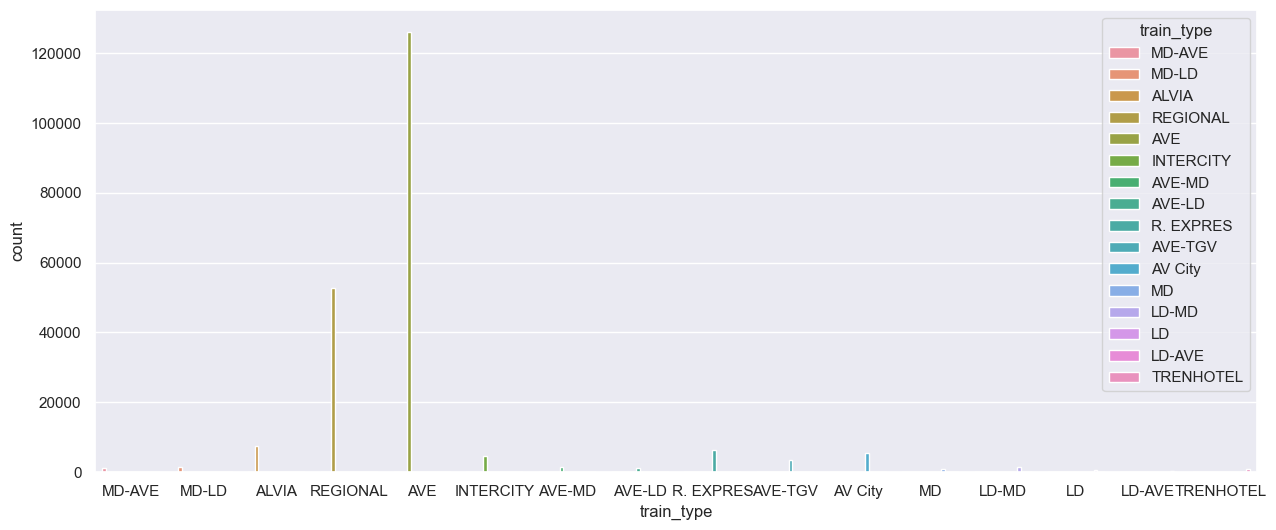

In [40]:
#write code here
plt.figure(figsize=(15, 6))
sns.countplot(x='train_type',hue='train_type', data=df)


**Question: Which train runs the maximum in number as compared to other train types?**

**Answer:** AVE


#### **Task 15: Plot number of trains of different class**


<Axes: xlabel='train_class', ylabel='count'>

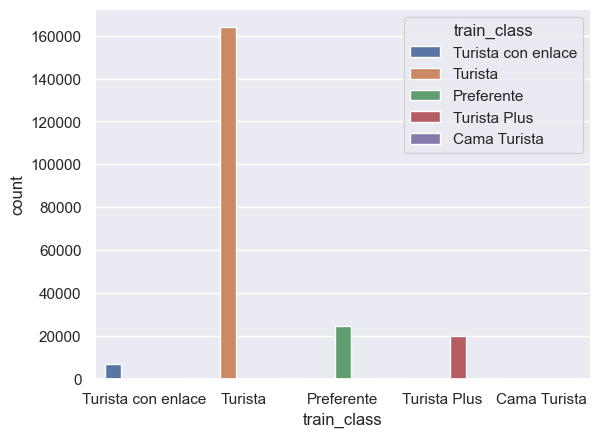

In [42]:
#write code here
sns.countplot(x='train_class',hue='train_class', data=df)

**Question: Which the most common train class for traveling among people in general?**

**Answer:** Turista


#### **Task 16: Plot number of tickets bought from each category**


<Axes: xlabel='fare', ylabel='count'>

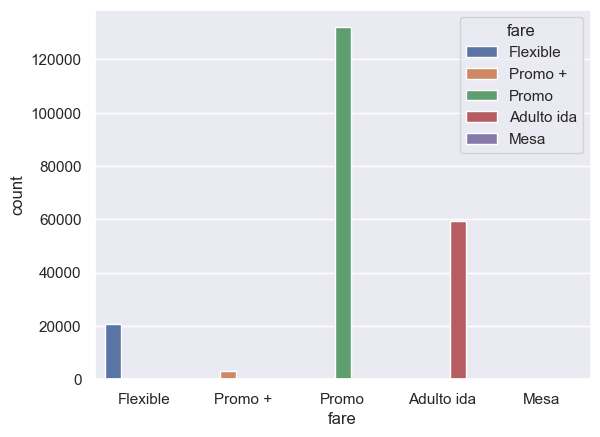

In [44]:
#write code here
sns.countplot(x='fare',hue='fare', data=df)

**Question: Which the most common tickets are bought?**

**Answer:** Promo fare

#### **Task 17: Plot distribution of the ticket prices**

C:\Users\Arshad Masood\AppData\Local\Temp\ipykernel_5784\329260086.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price']);
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


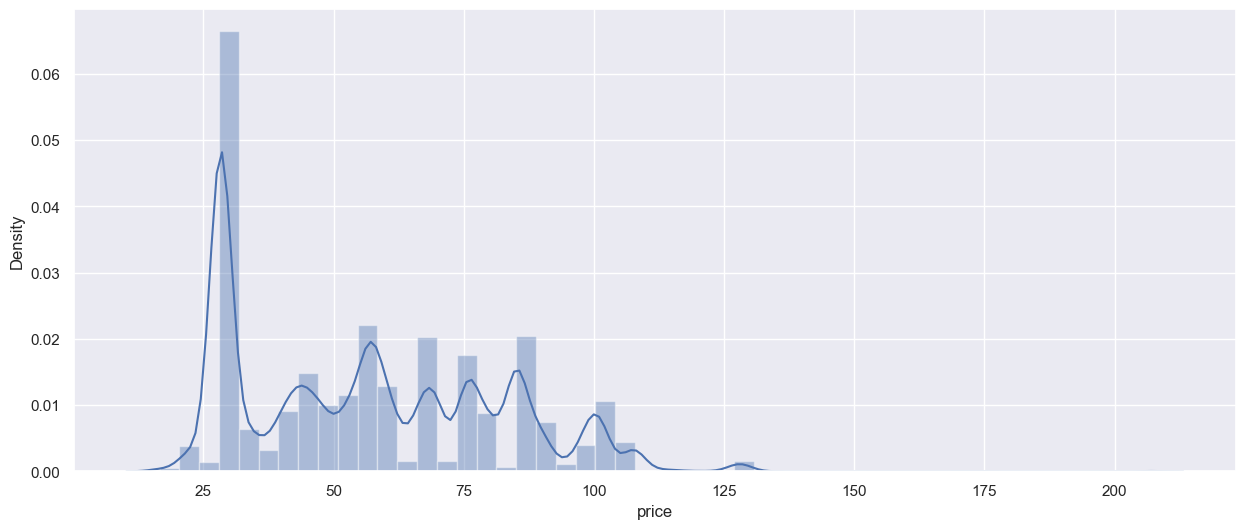

In [46]:
#write code here
plt.subplots(figsize=(15,6))
sns.distplot(df['price']);

**Question: What readings can you get from the above plot?**

**Answer:**          

###### **Task 18: Show train_class vs price through boxplot**

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

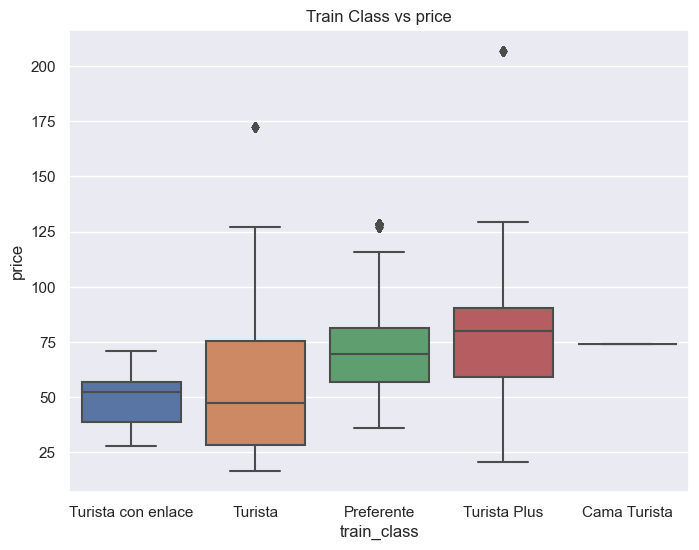

In [48]:
#write code here
plt.figure(figsize=(8,6))
sns.boxplot(x='train_class', y='price', data=df)
plt.title('Train Class vs price')
plt.xlable('Train Class')
plt.ylabe('price')
plt.show()

**Question: What pricing trends can you find out by looking at the plot above?**

**Answer:** Skewed

#### **Task 19: Show train_type vs price through boxplot**


AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

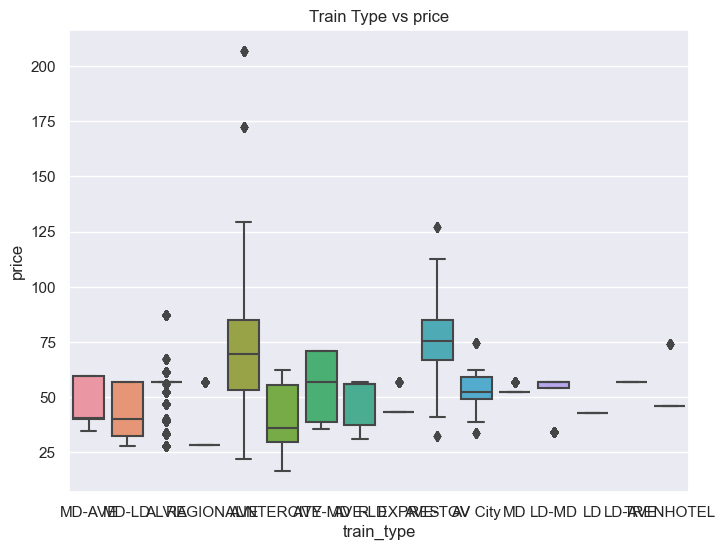

In [50]:
#write code here
plt.figure(figsize=(8,6))
sns.boxplot(x='train_type', y='price', data=df)
plt.title('Train Type vs price')
plt.xlable('Train Type')
plt.ylabe('price')
plt.show()

**Question: Which type of trains cost more as compared to others?**

**Answer:** 



## Feature Engineering


In [52]:
df = df.reset_index()

**Finding the travel time between the place of origin and destination**<br>
We need to find out the travel time for each entry which can be obtained from the 'start_date' and 'end_date' column. Also if you see, these columns are in object type therefore datetimeFormat should be defined to perform the necessary operation of getting the required time.

**Import datetime library**

In [54]:
#write code here
import datetime

In [56]:
datetimeFormat = '%Y-%m-%d %H:%M:%S'
def fun(a,b):
    diff = datetime.datetime.strptime(b, datetimeFormat)- datetime.datetime.strptime(a, datetimeFormat)
    return(diff.seconds/3600.0)                  
    

In [66]:
df['travel_time_in_hrs'] = df.apply(lambda x:fun(x['start_date'],x['end_date']),axis=1)

#### **Task 20: Remove redundant features**


In [68]:
df.head()

,index,origin,destination,start_date,end_date,train_type,price,train_class,fare,travel_time_in_hrs
0,0,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible,4.700000
1,1,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +,5.800000
2,2,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +,5.916667
3,3,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +,4.983333
4,4,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo,4.133333


**You need to remove features that are giving the related values as  'travel_time_in_hrs'**<br>
*Hint: Look for date related columns*

In [148]:
#write code here
columns_to_drop = ['start_date', 'end_date']
df1 = df.drop(columns=columns_to_drop)    

print(df1)

KeyError: "['start_date', 'end_date'] not found in axis"

In [136]:
df1.head()

,index,origin,destination,train_type,price,train_class,fare
364,364,MADRID,SEVILLA,AV City,49.150000,Turista,Promo
365,365,MADRID,SEVILLA,ALVIA,56.723877,Preferente,Promo
366,366,MADRID,SEVILLA,AVE,69.400000,Preferente,Promo
367,367,MADRID,SEVILLA,AVE,76.300000,Turista,Flexible
368,368,MADRID,SEVILLA,ALVIA,56.723877,Preferente,Promo


We now need to find out the pricing from 'MADRID' to other destinations. We also need to find out time which each train requires for travelling. 

## **Travelling from MADRID to SEVILLA**

#### Task 21: Findout people travelling from MADRID to SEVILLA

In [140]:
#write code here
df2 = df1[(df1['origin'] == 'MADRID')&(df1['destination'] == 'SEVILLA')]
df2.head(50)

,index,origin,destination,train_type,price,train_class,fare
364,364,MADRID,SEVILLA,AV City,49.150000,Turista,Promo
365,365,MADRID,SEVILLA,ALVIA,56.723877,Preferente,Promo
366,366,MADRID,SEVILLA,AVE,69.400000,Preferente,Promo
367,367,MADRID,SEVILLA,AVE,76.300000,Turista,Flexible
368,368,MADRID,SEVILLA,ALVIA,56.723877,Preferente,Promo
369,369,MADRID,SEVILLA,AVE,69.400000,Preferente,Promo
370,370,MADRID,SEVILLA,AVE,69.400000,Preferente,Promo
371,371,MADRID,SEVILLA,ALVIA,56.723877,Preferente,Promo
372,372,MADRID,SEVILLA,AVE,69.400000,Preferente,Promo
373,373,MADRID,SEVILLA,AVE,69.400000,Preferente,Promo


In [142]:
train_type = df2['train_type'].unique()
print("Unique train_type:",train_type)

Unique train_type: ['AV City' 'ALVIA' 'AVE' 'INTERCITY' 'MD-LD' 'LD-AVE']


#### Task 22: Make a plot for finding out travelling hours for each train type

In [150]:
#write code here
travel_time_in_hrs = df.groupby('train_type')['travel_time_in_hrs'].mean()
plt.figure(figsize=(15, 6))
sns.boxplot(x='train_type', y='travel_time_in_hrs', data=df) 
plt.title('Travel Time for Each Train Type') 
plt.xlabel('Train Type') 
plt.ylabel('Travel Time (Hours)')
plt.show()

KeyError: 'Column not found: travel_time_in_hrs'

#### **Task 23: Show train_type vs price through boxplot**


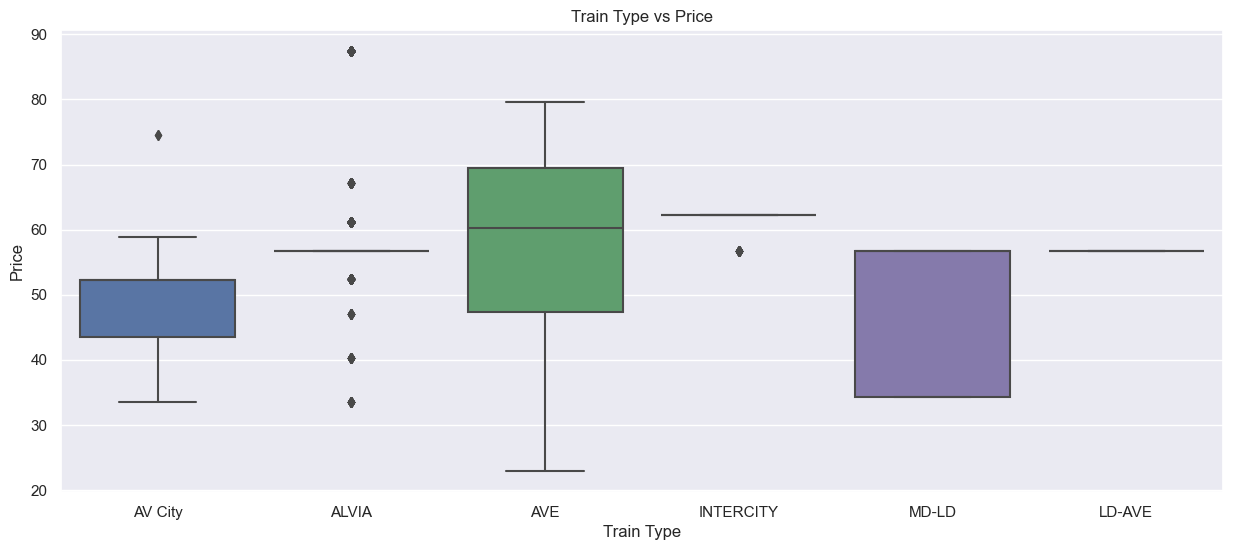

In [152]:
#write code here
plt.figure(figsize=(15, 6))
sns.boxplot(x='train_type', y='price', data=df1)
plt.title('Train Type vs Price')
plt.xlabel('Train Type')
plt.ylabel('Price')
plt.show()

## **Travelling from MADRID to BARCELONA**


#### Task 24: Findout people travelling from MADRID to BARCELONA

In [68]:
#write code here
df2 = df[(df['origin'] == 'MADRID') & (df['destination'] == 'BARCELONA')]
print("People traveling from Madrid to Barcelona:")
print(df2)

People traveling from Madrid to Barcelona:
         index  origin destination train_type  price   train_class        fare
79          79  MADRID   BARCELONA  R. EXPRES  43.25       Turista  Adulto ida
80          80  MADRID   BARCELONA  R. EXPRES  43.25       Turista  Adulto ida
81          81  MADRID   BARCELONA  R. EXPRES  43.25       Turista  Adulto ida
82          82  MADRID   BARCELONA  R. EXPRES  43.25       Turista  Adulto ida
83          83  MADRID   BARCELONA        AVE  66.75       Turista       Promo
...        ...     ...         ...        ...    ...           ...         ...
215085  215728  MADRID   BARCELONA        AVE  80.15  Turista Plus       Promo
215086  215729  MADRID   BARCELONA        AVE  98.00    Preferente       Promo
215087  215730  MADRID   BARCELONA        AVE  69.80  Turista Plus       Promo
215088  215731  MADRID   BARCELONA        AVE  58.15       Turista       Promo
215089  215732  MADRID   BARCELONA        AVE  66.75       Turista       Promo

[40728 r

#### Task 25: Make a plot for finding out travelling hours for each train type

In [154]:
#write code here
plt.figure(figsize=(10, 6))
sns.boxplot(x='train_type', y='travel_time_in_hrs', data=df2)
plt.title('Travel Time for Each Train Type')
plt.xlabel('Train Type')
plt.ylabel('Travel Time (Hours)')
plt.show()

ValueError: Could not interpret input 'travel_time_in_hrs'

<Figure size 1000x600 with 0 Axes>

#### **Task 26: Show train_type vs price through boxplot**

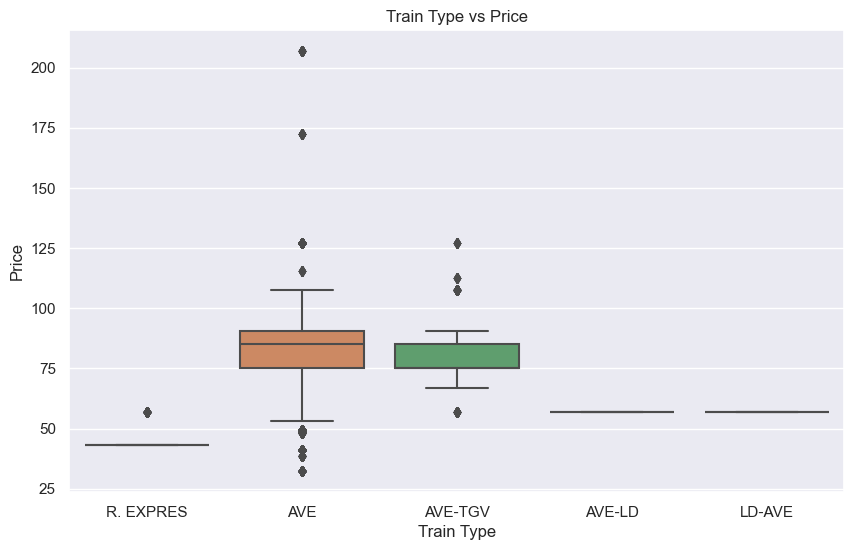

In [74]:
#write code here
plt.figure(figsize=(10, 6))
sns.boxplot(x='train_type', y='price', data=df2)
plt.title('Train Type vs Price')
plt.xlabel('Train Type')
plt.ylabel('Price')
plt.show()

## **Travelling from MADRID to VALENCIA**

#### Task 27: Findout people travelling from MADRID to VALENCIA

In [89]:
#write code here
df3 = df[(df['origin'] == 'MADRID') & (df['destination'] == 'VALENCIA')]
print("People traveling from Madrid to Valencia:")
print(df3)

People traveling from Madrid to Valencia:
         index  origin destination train_type  price train_class        fare  \
5            5  MADRID    VALENCIA   REGIONAL  28.35     Turista  Adulto ida   
6            6  MADRID    VALENCIA   REGIONAL  28.35     Turista  Adulto ida   
7            7  MADRID    VALENCIA   REGIONAL  28.35     Turista  Adulto ida   
8            8  MADRID    VALENCIA   REGIONAL  28.35     Turista  Adulto ida   
9            9  MADRID    VALENCIA   REGIONAL  28.35     Turista  Adulto ida   
...        ...     ...         ...        ...    ...         ...         ...   
214830  215473  MADRID    VALENCIA        AVE  33.65     Turista       Promo   
214831  215474  MADRID    VALENCIA   REGIONAL  28.35     Turista  Adulto ida   
214832  215475  MADRID    VALENCIA        AVE  39.45     Turista       Promo   
214833  215476  MADRID    VALENCIA        AVE  45.30     Turista       Promo   
214834  215477  MADRID    VALENCIA        AVE  33.65     Turista       Promo  

#### Task 28: Make a plot for finding out travelling hours for each train type

In [120]:
#write code here
plt.figure(figsize=(10, 6))
sns.boxplot(x='train_type', y='travel_time_in_hrs', data=df3)
plt.title('Travel Time for Each Train Type')
plt.xlabel('Train Type')
plt.ylabel('Travel Time (Hours)')
plt.show()

NameError: name 'df3' is not defined

<Figure size 1000x600 with 0 Axes>

#### **Task 29: Show train_type vs price through boxplot**

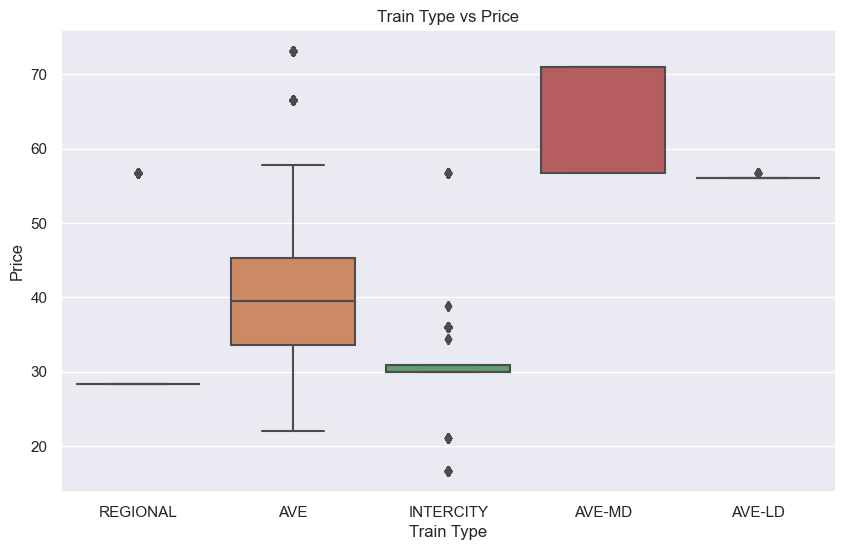

In [93]:
#write code here
plt.figure(figsize=(10, 6))
sns.boxplot(x='train_type', y='price', data=df3)
plt.title('Train Type vs Price')
plt.xlabel('Train Type')
plt.ylabel('Price')
plt.show()

## **Travelling from MADRID to PONFERRADA**

#### Task 30: Findout people travelling from MADRID to PONFERRADA

In [95]:
#write code here
df4 = df[(df['origin'] == 'MADRID') & (df['destination'] == 'PONFERRADA')]
print("People traveling from Madrid to Ponferrada:")
print(df4)

People traveling from Madrid to Ponferrada:
         index  origin destination train_type      price         train_class  \
233        233  MADRID  PONFERRADA     AVE-MD  35.750000  Turista con enlace   
234        234  MADRID  PONFERRADA     AVE-LD  31.200000  Turista con enlace   
235        235  MADRID  PONFERRADA      ALVIA  33.500000             Turista   
236        236  MADRID  PONFERRADA      LD-MD  56.723877  Turista con enlace   
237        237  MADRID  PONFERRADA         LD  42.750000  Turista con enlace   
...        ...     ...         ...        ...        ...                 ...   
215066  215709  MADRID  PONFERRADA     AVE-LD  31.200000  Turista con enlace   
215067  215710  MADRID  PONFERRADA      ALVIA  33.500000             Turista   
215068  215711  MADRID  PONFERRADA      LD-MD  56.723877  Turista con enlace   
215069  215712  MADRID  PONFERRADA         LD  42.750000  Turista con enlace   
215070  215713  MADRID  PONFERRADA      LD-MD  54.100000  Turista con enlace

#### Task 31: Make a plot for finding out travelling hours for each train type

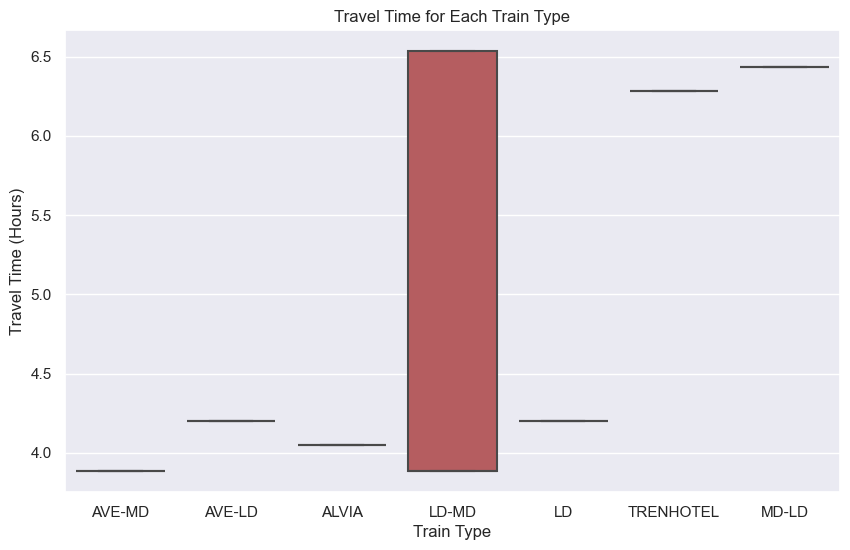

In [97]:
#write code here
plt.figure(figsize=(10, 6))
sns.boxplot(x='train_type', y='travel_time_in_hrs', data=df4)
plt.title('Travel Time for Each Train Type')
plt.xlabel('Train Type')
plt.ylabel('Travel Time (Hours)')
plt.show()

#### **Task 32: Show train_type vs price through boxplot**

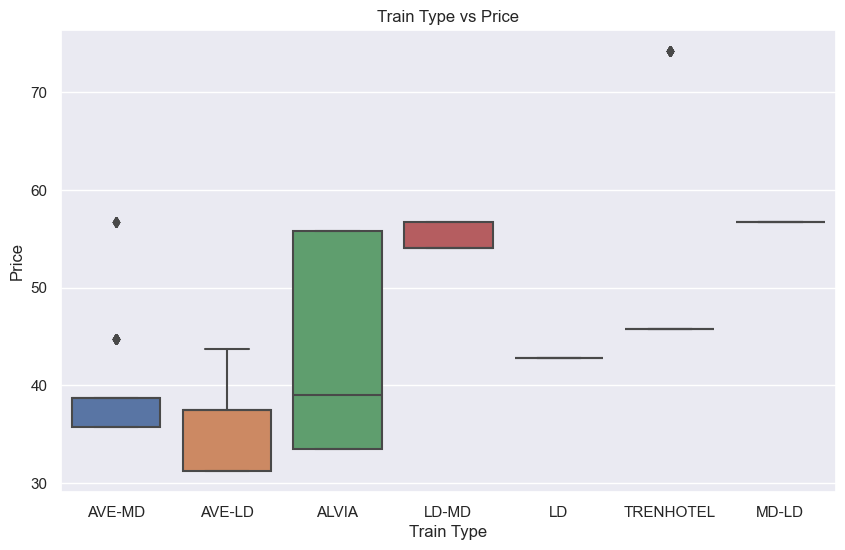

In [99]:
#write code here
plt.figure(figsize=(10, 6))
sns.boxplot(x='train_type', y='price', data=df4)
plt.title('Train Type vs Price')
plt.xlabel('Train Type')
plt.ylabel('Price')
plt.show()

# Applying Linear  Regression

#### Task 33: Import LabelEncoder library from sklearn 

In [101]:
#write code here
import sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

**Data Encoding**

In [103]:
lab_en = LabelEncoder()
df.iloc[:,1] = lab_en.fit_transform(df.iloc[:,1])
df.iloc[:,2] = lab_en.fit_transform(df.iloc[:,2])
df.iloc[:,3] = lab_en.fit_transform(df.iloc[:,3])
df.iloc[:,5] = lab_en.fit_transform(df.iloc[:,5])
df.iloc[:,6] = lab_en.fit_transform(df.iloc[:,6])

In [119]:
df.head(50)

,index,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
0,0,2,1,11,59.50,4,1,4.700000
1,1,2,1,11,34.65,4,4,5.800000
2,2,2,1,12,39.95,4,4,5.916667
3,3,2,1,11,40.60,4,4,4.983333
4,4,2,1,0,27.90,2,3,4.133333
5,5,1,4,14,28.35,2,0,6.783333
6,6,1,4,14,28.35,2,0,6.716667
7,7,1,4,14,28.35,2,0,6.700000
8,8,1,4,14,28.35,2,0,6.583333
9,9,1,4,14,28.35,2,0,6.366667


#### Task 34: Separate the dependant and independant variables

In [121]:
#write code here
X = df.drop(['price'], axis=1)
Y = df[['price']]

In [123]:
print(X.shape)
print(Y.shape)

(215266, 7)
(215266, 1)


#### Task 35: Import test_train_split from sklearn

In [139]:
#write code here
from sklearn.model_selection import train_test_split


#### Task 36:**Split the data into training and test set**

In [141]:
#write code here
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.25, random_state=25,shuffle=True)

In [143]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(161449, 7) (161449, 1)
(53817, 7) (53817, 1)


#### Task 37: Import LinearRegression library from sklearn

In [149]:
#write code here
from sklearn.linear_model import LinearRegression



#### Task 38: Make an object of LinearRegression( ) and train it using the training data set

In [151]:
#write code here
lr = LinearRegression()

In [153]:
#write code here
lr.fit(xtrain, ytrain)

LinearRegression()

#### Task 39: Find out the predictions using test data set.

In [155]:
#write code here
lr_predict = lr.predict(xtest)

#### Task 40: Find out the predictions using training data set.

In [ ]:
#write code here
lr_predict_train = None

#### Task 41: Import r2_score library form sklearn

In [ ]:
#write code here


#### Task 42: Find out the R2 Score for test data and print it.

In [ ]:
#write code here
lr_r2_test= None

#### Task 43: Find out the R2 Score for training data and print it.

In [ ]:
lr_r2_train = None

Comaparing training and testing R2 scores

In [ ]:
print('R2 score for Linear Regression Testing Data is: ', lr_r2_train)
print('R2 score for Linear Regression Testing Data is: ', lr_r2_test)

# Applying Polynomial Regression

#### Task 44: Import PolynomialFeatures from sklearn

In [ ]:
#write code here


#### Task 45: Make and object of default Polynomial Features

In [ ]:
#write code here
poly_reg = None

#### Task 46: Transform the features to higher degree features.

In [ ]:
#write code here
X_train_poly,X_test_poly = None

#### Task 47: Fit the transformed features to Linear Regression

In [ ]:
#write code here
poly_model = None

#### Task 48: Find the predictions on the data set

In [ ]:
#write code here
y_train_predicted,y_test_predict = None

#### Task 49: Evaluate R2 score for training data set

In [ ]:
#evaluating the model on training dataset
#write code here
r2_train = None

#### Task 50: Evaluate R2 score for test data set

In [ ]:
# evaluating the model on test dataset
#write code here
r2_test = None

Comaparing training and testing R2 scores

In [ ]:
#write code here
print ('The r2 score for training set is: ',r2_train)
print ('The r2 score for testing set is: ',r2_test)

#### Task 51: Select the best model

**Question: Which model gives the best result for price prediction? Find out the complexity using R2 score and give your answer.**<br>
*Hint: Use for loop for finding the best degree and model complexity for polynomial regression model*

In [ ]:
#write code here
r2_train=[]
r2_test=[]
for i in range(1,6):
    poly_reg = None
    
    X_tr_poly,X_tst_poly = None
    poly = None
    poly.fit(X_tr_poly, Y_train)
   
    y_tr_predicted,y_tst_predict = None
    r2_train.append(r2_score(Y_train, y_tr_predicted))
    r2_test.append(r2_score(Y_test, y_tst_predict))
    
print ('R2 Train', r2_train)
print ('R2 Test', r2_test)

#### Plotting the model

In [ ]:
plt.figure(figsize=(18,5))
sns.set_context('poster')
plt.subplot(1,2,1)
sns.lineplot(x=list(range(1,6)), y=r2_train, label='Training');
plt.subplot(1,2,2)
sns.lineplot(x=list(range(1,6)), y=r2_test, label='Testing');

**Answer**